## MMTHE01 - Masters Thesis

### E3. Thesis - Apply and Evaluate different XAI methods - Case Study with the ANN Model

* Applying XAI on a Deep Learning AI model (ANN Model)

#### Importing the libraries

In [1]:
### import general libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import time
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder

In [2]:
os.chdir(r'S:\Semester 4\Masters Thesis Report\6. Analysis')

#### Importing the dataset

In [3]:
dataset = pd.read_csv('train_dataset_final_encoded.csv.csv')

In [4]:
dataset.head()

,isFraud,TransactionDT,TransactionAmt,card1,C3,C9,C12,C13,C14,TransactionID,...,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,M4_M0,M4_M1,M4_M2
0,0,86400,68.5,13926,0.0,1.0,0.0,1.0,1.0,2987000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,86401,29.0,2755,0.0,0.0,0.0,1.0,1.0,2987001,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,86469,59.0,4663,0.0,1.0,0.0,1.0,1.0,2987002,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,86499,50.0,18132,0.0,1.0,0.0,25.0,1.0,2987003,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,86506,50.0,4497,0.0,0.0,0.0,1.0,1.0,2987004,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [5]:
dataset.shape

(590540, 201)

### 5.1 Split the data into Train-Test

#### 5.1.1 Separate the features and the label

In [6]:
dataset_final = dataset.drop('TransactionID', axis=1)

In [7]:
#X = dataset.iloc[:, 1:].values
#y = dataset.iloc[:,0].values

In [8]:
X = dataset_final.iloc[:, 1:]
y = dataset_final.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split
X_train_im, X_test, y_train_im, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 1)

### 5.2 Applying SMOTE

In [ ]:
# Applying SMOTE only to the training data
smote = SMOTE(random_state=1)
X_train, y_train = smote.fit_resample(X_train_im, y_train_im)

### 5.3 Feature Scaling

In [10]:
sc = StandardScaler()
X_tn_scaled = sc.fit_transform(X_train)
X_tt_scaled = sc.fit_transform(X_test)


# Convert to dataframe
X_train_scaled = pd.DataFrame(X_tn_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_tt_scaled, columns=X_test.columns)

### 5.4 Model Fitting

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
# Build an ANN model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicit Input layer instead of input_dim in Dense
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_AUC', patience=3, restore_best_weights=True, mode='max')

In [13]:
# Train the ANN model with timing
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.7477 - loss: 0.1595 - val_AUC: 0.8621 - val_loss: 0.1040
Epoch 2/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8437 - loss: 0.1094 - val_AUC: 0.8731 - val_loss: 0.1007
Epoch 3/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.8543 - loss: 0.1051 - val_AUC: 0.8769 - val_loss: 0.0990
Epoch 4/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8676 - loss: 0.1010 - val_AUC: 0.8814 - val_loss: 0.0970
Epoch 5/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - AUC: 0.8759 - loss: 0.0978 - val_AUC: 0.8856 - val_loss: 0.0952
Epoch 6/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - AUC: 0.8777 - loss: 0.0959 - val_AUC: 0.8859 - val_loss: 0.0950
Epoch 7/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8801 - loss: 0.0942 - val_AUC: 0.8898 - val_loss: 0.0928
Epoch 8/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8842 - loss: 0.0933 - val_AUC: 0.8920 - val_loss: 0.0920
Epoch 9/20
1477/1477 ━━━━━━━━━━━━━━━━━

### 5.5 Applying XAI methods to the ANN Model

#### 5.5.1 Applying SHAP to the ANN Model

In [14]:
feature_names = X_train.columns.tolist()

In [15]:
### import
import shap
shap.initjs()

In [16]:
start_time = time.time()

In [17]:
#Use a sample of training data as the masker
masker = shap.maskers.Independent(X_train_scaled)

In [18]:
shap_explainer = shap.Explainer(model, masker)

In [19]:
shap_values = shap_explainer(X_test_scaled)

PermutationExplainer explainer: 118109it [10:10:37,  3.22it/s]                                                         


In [20]:
end_time = time.time()
training_time = end_time - start_time
print(f"SHAP on ANN Model (Explanation Time): {training_time:.2f} seconds")

SHAP on ANN Model (Explanation Time): 36642.28 seconds


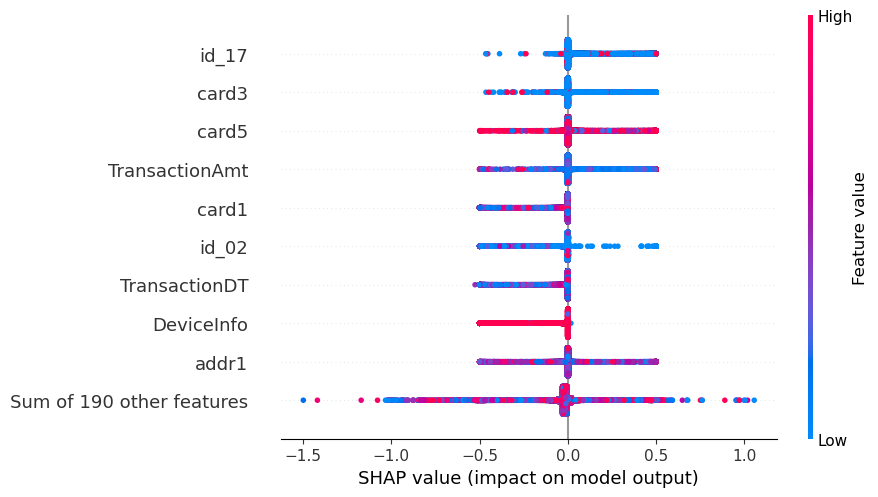

In [21]:
shap.plots.beeswarm(shap_values)

In [22]:
shap.plots.force(shap_values[0])

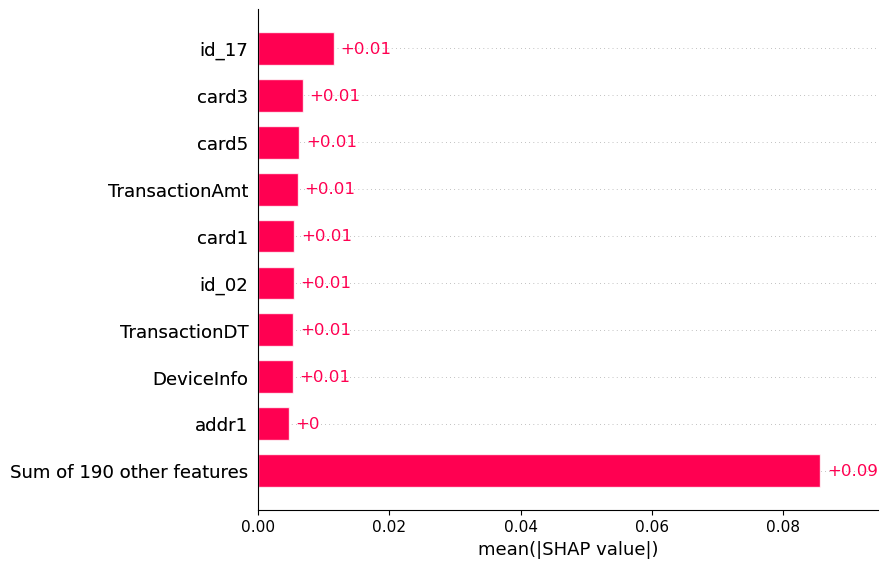

In [41]:
shap.plots.bar(shap_values)

In [54]:
shap.plots.scatter(shap_values[:, "TransactionAmt"], color=shap_values.values)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [55]:
shap_values.values

array([[ 0.00000000e+00,  1.09294124e-18, -6.98447106e-04, ...,
         0.00000000e+00,  9.27165953e-19,  1.55312602e-22],
       [ 0.00000000e+00,  0.00000000e+00, -3.96313441e-12, ...,
        -1.37822532e-02,  0.00000000e+00, -1.29691286e-04],
       [ 0.00000000e+00,  0.00000000e+00, -4.71969765e-02, ...,
         0.00000000e+00, -2.48429687e-20,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -2.90883488e-05, ...,
         7.08974065e-05,  0.00000000e+00, -4.44061104e-21],
       [ 0.00000000e+00,  0.00000000e+00, -3.27909538e-12, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -2.83785553e-11,  0.00000000e+00]])

In [50]:
shap_values[0].values.shape

(199,)

In [51]:
shap_values[0].data

array([ 4.65578100e+06,  2.95400000e+01,  6.10700000e+03,  0.00000000e+00,
        4.00000000e+00,  0.00000000e+00,  3.90000000e+01,  4.00000000e+00,
        4.67000000e+02,  1.50000000e+02,  2.26000000e+02,  1.58000000e+02,
        8.70000000e+01,  1.60000000e+01,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00, -5.00000000e+00,  1.10200000e+03,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+02,  5.20000000e+01,
        1.66000000e+02,  2.66000000e+02,  5.07000000e+02,  1.59800000e+03,
        1.18502180e+02,  2.20000000e+02,  2.00000000e+00,  1.40002441e+02,
        4.23359649e+01,  2.20000000e+02,  1.46621465e+02,  2.20000000e+02,
        9.99945382e-01,  1.04520438e+00,  1.07807475e+00,  8.76990744e-01,
        1.04568631e+00,  1.07286998e+00,  1.02770415e+00,  1.04152892e+00,
        4.78986548e-01,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  